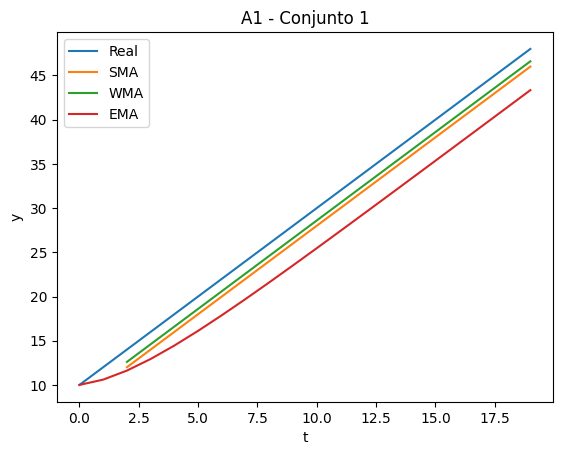

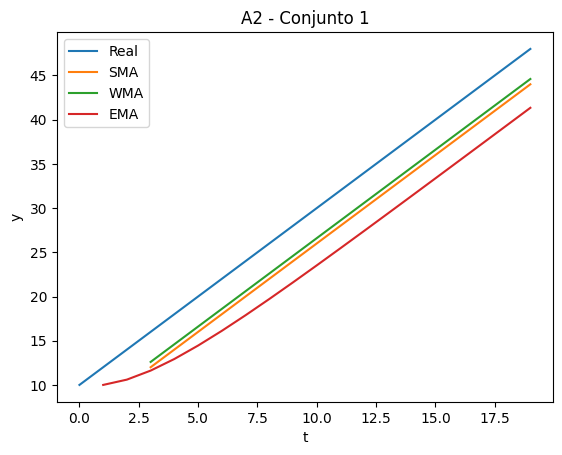

Conjunto 1
MAE RMSE MAPE sMAPE
SMA 4.0 4.0 13.9188 15.1093
WMA 3.4 3.4 11.831 12.6788
EMA 5.8489 5.9823 20.8645 23.4529



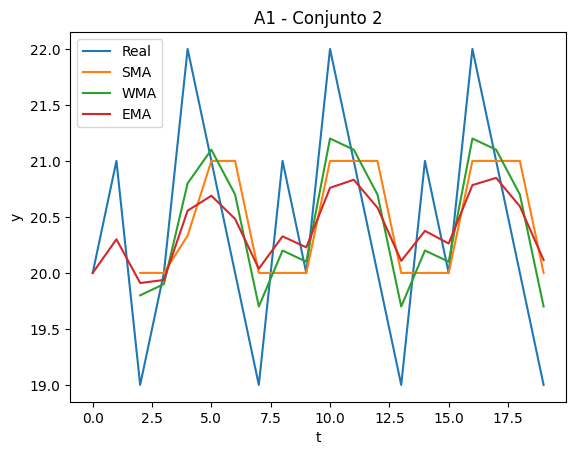

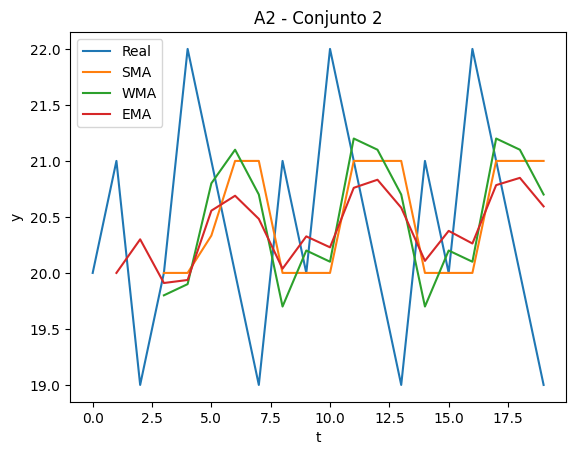

Conjunto 2
MAE RMSE MAPE sMAPE
SMA 1.0392 1.3161 5.0912 5.0699
WMA 1.0647 1.273 5.1999 5.203
EMA 0.9709 1.1358 4.7567 4.7579



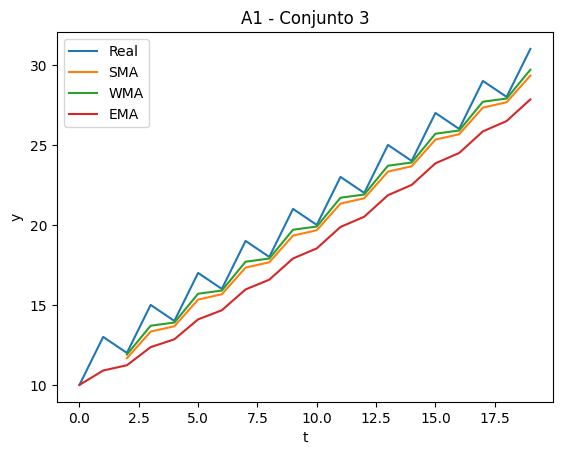

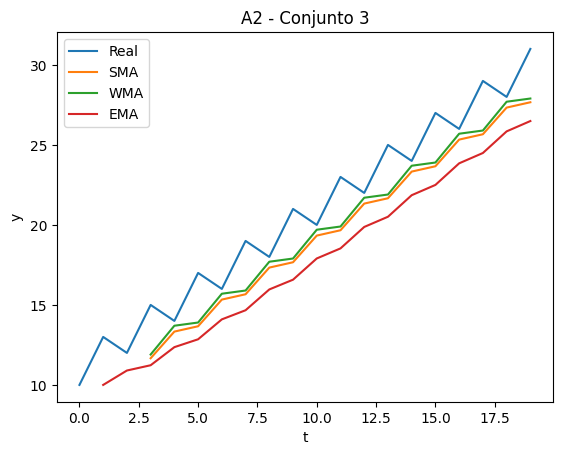

Conjunto 3
MAE RMSE MAPE sMAPE
SMA 2.0784 2.4681 9.6697 10.4139
WMA 1.7824 2.265 8.2384 8.8593
EMA 3.1307 3.357 15.2462 16.7196



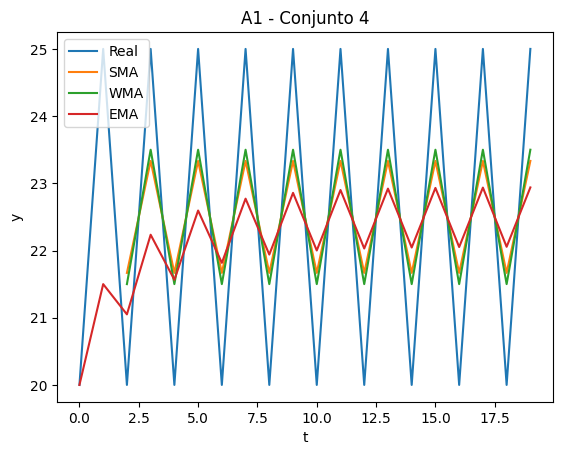

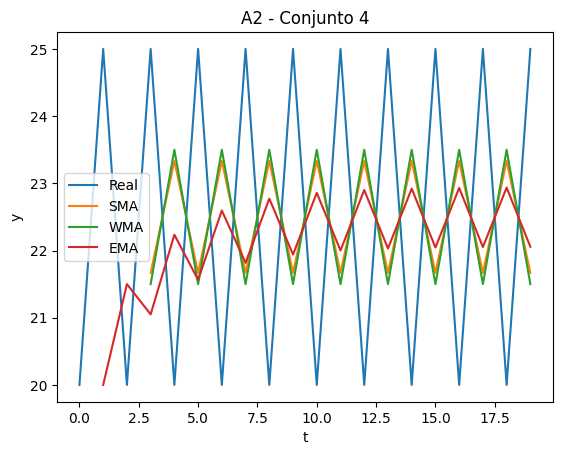

Conjunto 4
MAE RMSE MAPE sMAPE
SMA 3.3333 3.3333 14.902 14.8028
WMA 3.5 3.5 15.6471 15.5423
EMA 3.005 3.0763 13.2647 13.3965



In [5]:
import numpy as np
import matplotlib.pyplot as plt

# DATOS
series = {
    "Conjunto 1": [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48],
    "Conjunto 2": [20, 21, 19, 20, 22, 21, 20, 19, 21, 20, 22, 21, 20, 19, 21, 20, 22, 21, 20, 19],
    "Conjunto 3": [10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31],
    "Conjunto 4": [20, 25, 20, 25, 20, 25, 20, 25, 20, 25, 20, 25, 20, 25, 20, 25, 20, 25, 20, 25]
}

# PARÁMETROS
k = 3
w1, w2, w3 = 0.5, 0.3, 0.2
alpha = 0.3

# SUAVIZADOS
def sma(x, k):
    s = [None] * len(x)
    for t in range(k - 1, len(x)):
        s[t] = sum(x[t - k + 1:t + 1]) / k
    return s

def wma(x):
    s = [None] * len(x)
    for t in range(2, len(x)):
        s[t] = w1 * x[t] + w2 * x[t - 1] + w3 * x[t - 2]
    return s

def ema(x, alpha):
    s = [None] * len(x)
    s[0] = x[0]
    for t in range(1, len(x)):
        s[t] = alpha * x[t] + (1 - alpha) * s[t - 1]
    return s

# PRONÓSTICO
def forecast_1_step(s):
    yhat = [None] * len(s)
    for t in range(1, len(s)):
        yhat[t] = s[t - 1]
    return yhat

# MÉTRICAS
def mae(y, yhat):
    e = []
    for t in range(len(y)):
        if yhat[t] is not None:
            e.append(abs(y[t] - yhat[t]))
    return sum(e) / len(e)

def rmse(y, yhat):
    e = []
    for t in range(len(y)):
        if yhat[t] is not None:
            e.append((y[t] - yhat[t]) ** 2)
    return (sum(e) / len(e)) ** 0.5

def mape(y, yhat):
    v = []
    for t in range(len(y)):
        if yhat[t] is not None:
            v.append(abs((y[t] - yhat[t]) / y[t]))
    return (sum(v) / len(v)) * 100

def smape(y, yhat):
    v = []
    for t in range(len(y)):
        if yhat[t] is not None:
            d = abs(y[t]) + abs(yhat[t])
            v.append(2 * abs(y[t] - yhat[t]) / d)
    return (sum(v) / len(v)) * 100

# GRÁFICAS
def plot(real, a, b, c, title, la, lb, lc):
    plt.figure()
    plt.plot(real, label="Real")
    plt.plot([np.nan if x is None else x for x in a], label=la)
    plt.plot([np.nan if x is None else x for x in b], label=lb)
    plt.plot([np.nan if x is None else x for x in c], label=lc)
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# EJECUCIÓN
for name, y in series.items():
    y = y[:]

    s1 = sma(y, k)
    s2 = wma(y)
    s3 = ema(y, alpha)

    plot(y, s1, s2, s3, f"A1 - {name}", "SMA", "WMA", "EMA")

    p1 = forecast_1_step(s1)
    p2 = forecast_1_step(s2)
    p3 = forecast_1_step(s3)

    plot(y, p1, p2, p3, f"A2 - {name}", "SMA", "WMA", "EMA")

    print(name)
    print("MAE RMSE MAPE sMAPE")
    print("SMA", round(mae(y, p1), 4), round(rmse(y, p1), 4), round(mape(y, p1), 4), round(smape(y, p1), 4))
    print("WMA", round(mae(y, p2), 4), round(rmse(y, p2), 4), round(mape(y, p2), 4), round(smape(y, p2), 4))
    print("EMA", round(mae(y, p3), 4), round(rmse(y, p3), 4), round(mape(y, p3), 4), round(smape(y, p3), 4))
    print()
